In [2]:
import pandas as pd
import numpy as np

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
#ML
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
#from imblearn.over_sampling import SMOTE

import missingno as msno

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")

#Parâmetros
x = df.drop(labels = ["loan_status"], axis = 1)
y = df["loan_status"]

df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include=['object','category'])

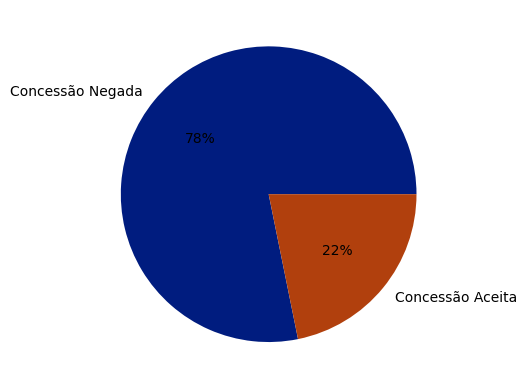

In [4]:
df["loan_status"].describe()
df.loan_status.value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('dark')
labels = ['Concessão Negada', 'Concessão Aceita']
#create pie chart
plt.pie(df.loan_status.value_counts() / len(df) * 100, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


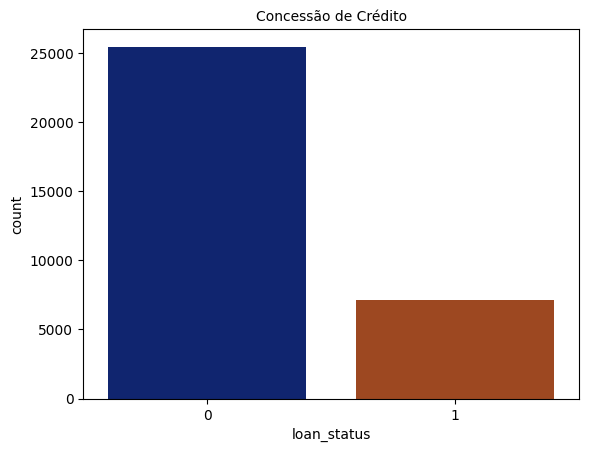

In [5]:

sns.countplot(x=df["loan_status"], palette='dark')
plt.title("Concessão de Crédito",fontsize=10)
plt.show()


In [6]:


df_mask_positive=df['loan_status']==1
filtered_df_positive = df[df_mask_positive]

df_mask_negative=df['loan_status']==0
filtered_df_negative = df[df_mask_negative]

#filtered_df.info()
ex.pie(filtered_df_positive,names='person_home_ownership',title='Situação habitacional das pessoas com crédito aprovado',hole=0.33)
ex.pie(filtered_df_negative,names='person_home_ownership',title='Situação habitacional das pessoas com crédito não aprovado',hole=0.33)

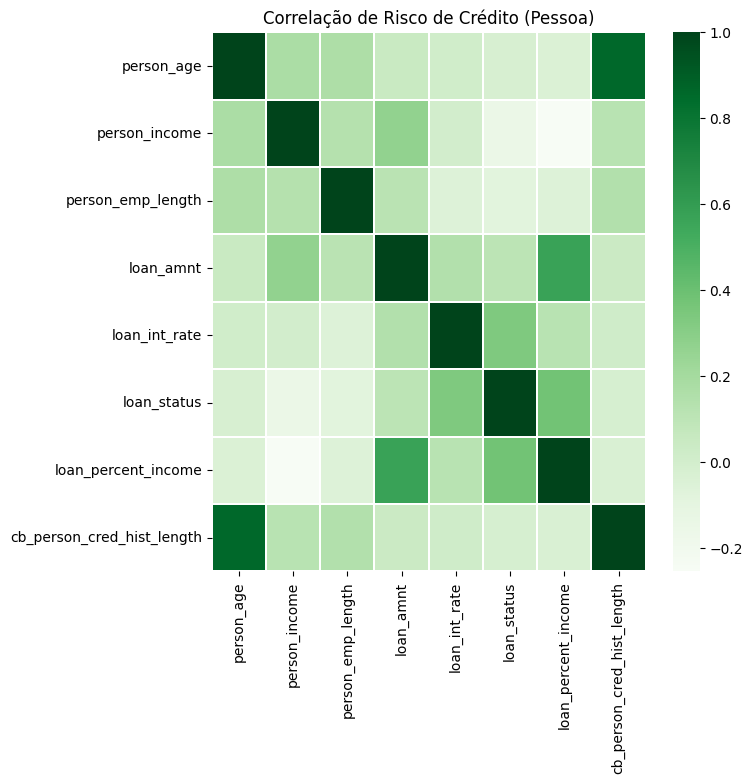

In [7]:
plt.figure(figsize = (7,7))
plt.title('Correlação de Risco de Crédito (Pessoa)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

In [9]:
cross_col = pd.crosstab(index = df_cat['loan_intent'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

cross_col

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.41,28.59
EDUCATION,82.78,17.22
HOMEIMPROVEMENT,73.90,26.10
MEDICAL,73.30,26.70
PERSONAL,80.11,19.89
VENTURE,85.19,14.81


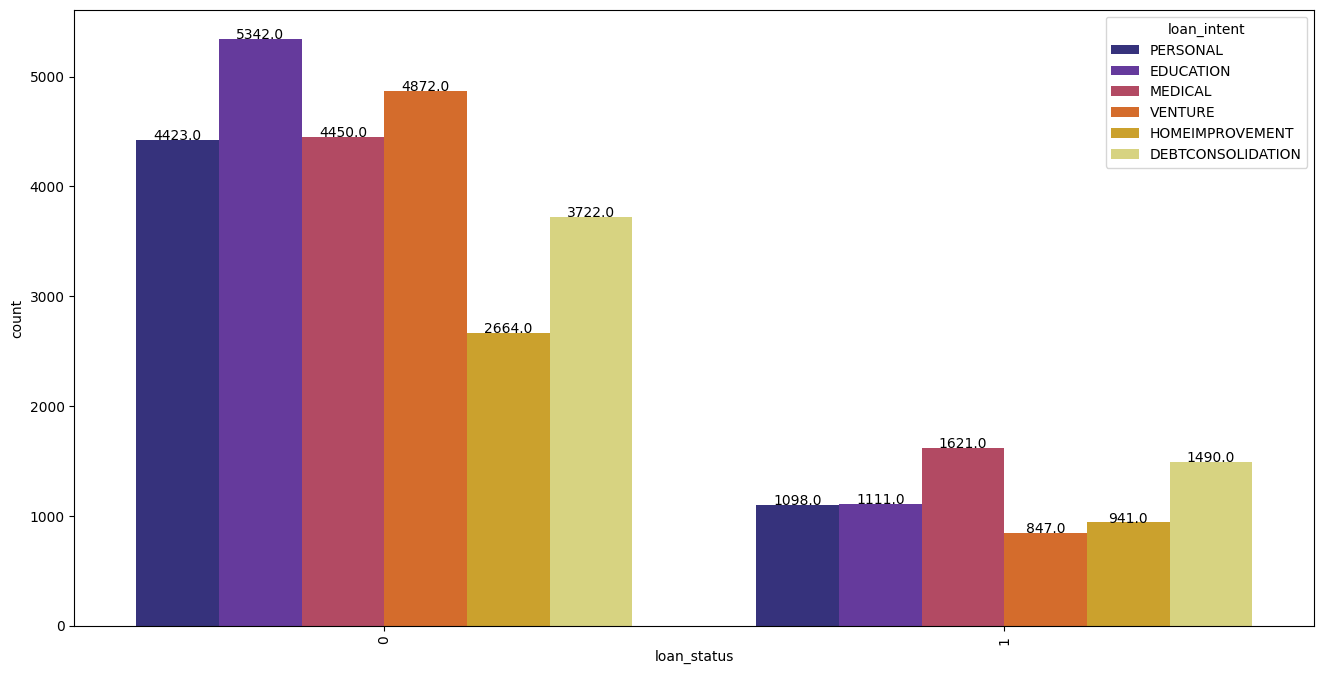

In [62]:
fig, ax1 = plt.subplots(figsize=(16,8))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_intent",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
sns.pairplot(df_num,hue="loan_status")

In [4]:
#MachineLearning


df.isnull().sum()

#Lidar com person_emp_length e loan_int_rate

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
print(df['person_age'].sort_values(ascending=False).head(10))
df['person_emp_length'].sort_values(ascending=False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64


0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31866     31.0
32263     31.0
31867     31.0
30914     31.0
32562     30.0
Name: person_emp_length, dtype: float64

In [7]:

#Eliminando Outliners (Idade de 144 anos?)
df.drop(df.loc[df['person_age'] == 144].index, inplace=True)
df.drop(df.loc[df['person_age'] == 123].index, inplace=True)
df['person_age'].sort_values(ascending=False).head(10)

32416    94
32506    84
32422    80
32355    78
32534    76
32381    73
32521    73
32432    73
32383    70
32360    70
Name: person_age, dtype: int64

In [8]:
#Eliminando Outliners (123 anos de trabalho?)
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)
df['person_emp_length'].sort_values(ascending=False).head(10)

32355    41.0
32515    38.0
32428    34.0
31867    31.0
32263    31.0
30914    31.0
31866    31.0
32539    30.0
32562    30.0
32480    29.0
Name: person_emp_length, dtype: float64

In [9]:
#Tratando dados Nulos
df.loc[df['person_emp_length'].isna()]
mean_person_emp_length = df['person_emp_length'].mean()
print(f'Media person_emp_length:{mean_person_emp_length}')
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length) 
df.isnull().sum()

Media person_emp_length:4.782063827772341


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
#Tratando dados Nulos
df.loc[df['loan_int_rate'].isna()]
mean_person_emp_length = df['loan_int_rate'].mean()
print(f'loan_int_rate:{mean_person_emp_length}')
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_person_emp_length) 
df.isnull().sum()

loan_int_rate:11.01152856512441


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
#Transformar Objects em Numeros

def categorical_variables(df):
    object_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

credit_df = categorical_variables(df)
credit_df.head()
credit_df.info()

In [ ]:
y = credit_df['loan_status'].values
print(y)

In [ ]:
x_df = credit_df.drop('loan_status', axis=1)
x = x_df.values
print(x)

In [18]:
seed = 25
size = 0.3
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=size, random_state=seed)

scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Accuracy train data: 84.23%
Accuracy predict: 85.02%
Precision: 72.29%
Recall: 46.42%
F1_score: 56.53%


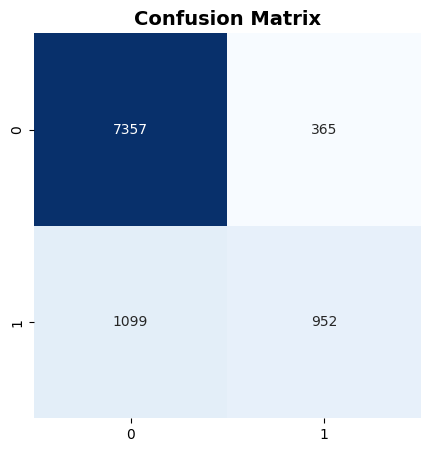

In [22]:
#Regressao

modelo = LogisticRegression(random_state=42)
modelo.fit(X_train_norm, Y_train)
score = modelo.score(X_train_norm, Y_train)
print('Accuracy train data: %.2f%%' % (score * 100))

predict = modelo.predict(X_test_norm)
predict


accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
fscore = f1_score(y_test, predict)

print('Accuracy predict: %.2f%%' % (accuracy * 100.0))
print('Precision: %.2f%%' % (precision * 100.0))
print('Recall: %.2f%%' % (recall * 100.0))
print('F1_score: %.2f%%' % (fscore * 100.0))

plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,predict), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

Accuracy predict: 93.19%
Precision: 96.26%
Recall: 70.26%
F1_score: 81.23%


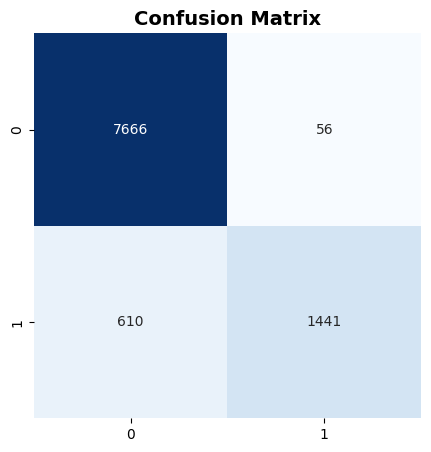

In [21]:
#Random Forest

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
Y_predict_clf = clf.predict(X_test)

accuracy = accuracy_score(y_test, Y_predict_clf)
precision = precision_score(y_test, Y_predict_clf)
recall = recall_score(y_test, Y_predict_clf)
fscore = f1_score(y_test, Y_predict_clf)

print('Accuracy predict: %.2f%%' % (accuracy * 100.0))
print('Precision: %.2f%%' % (precision * 100.0))
print('Recall: %.2f%%' % (recall * 100.0))
print('F1_score: %.2f%%' % (fscore * 100.0))


plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,Y_predict_clf), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()